In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import cv2 
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
type(x_train)

numpy.ndarray

In [4]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [6]:
print(x_train[10].shape)

(28, 28)


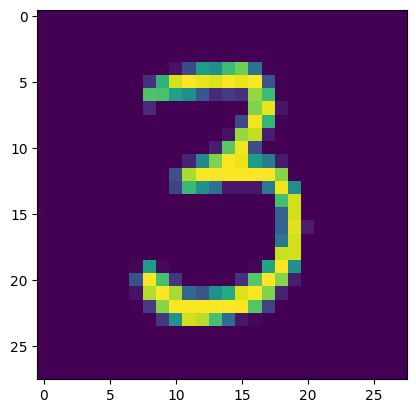

In [7]:
plt.imshow(x_train[50])
plt.show()

In [8]:
print(y_train[50])

3


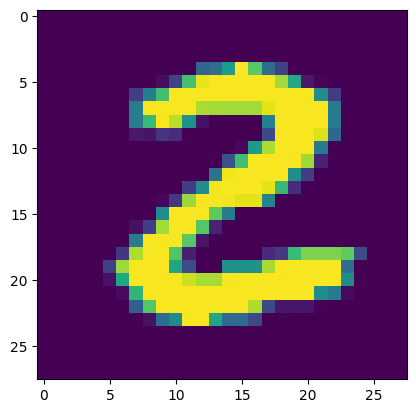

2


In [9]:
plt.imshow(x_train[25])
plt.show()
print(y_train[25])

In [10]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [11]:
x_train = x_train/255
x_test = x_test/255

In [12]:
print(x_train[50])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [13]:
model = keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(50, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid'),
])

In [14]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy']
             )

In [15]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 906us/step - loss: 0.2988 - accuracy: 0.9132
Epoch 2/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.1373 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.1044 - accuracy: 0.9680
Epoch 4/10
1875/1875 [==============================] - 2s 873us/step - loss: 0.0854 - accuracy: 0.9735
Epoch 5/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0718 - accuracy: 0.9776
Epoch 6/10
1875/1875 [==============================] - 2s 884us/step - loss: 0.0605 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 2s 899us/step - loss: 0.0543 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 2s 886us/step - loss: 0.0473 - accuracy: 0.9848
Epoch 9/10
1875/1875 [==============================] - 2s 887us/step - loss: 0.0412 - accuracy: 0.9867
Epoch 10/10
1875/1875 [==============================] - 2s 888u

In [16]:
loss, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
print(loss)

313/313 [==============================] - 0s 732us/step - loss: 0.1106 - accuracy: 0.9719
0.9718999862670898
0.11060618609189987


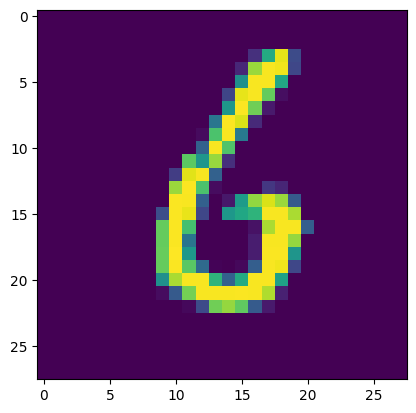

In [17]:
plt.imshow(x_test[50])
plt.show()

In [18]:
print(y_test[50])

6


In [19]:
y_pred = model.predict(x_test)
print(y_pred.shape)

313/313 [==============================] - 0s 602us/step
(10000, 10)


In [20]:
print(y_pred[0])

[2.4767560e-03 2.6109023e-04 4.0174985e-01 9.6319205e-01 1.9864737e-08
 5.0493504e-04 7.6092001e-11 9.9997264e-01 4.7235742e-02 3.7083342e-03]


In [21]:
label_for_first_image = np.argmax(y_pred[0])
print(label_for_first_image)

7


In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)


[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
con_matrix = confusion_matrix(y_test, y_pred_labels)
print(con_matrix)

tf.Tensor(
[[ 969    0    1    2    0    2    4    1    1    0]
 [   0 1125    4    0    0    2    3    0    1    0]
 [   6    2 1002    5    1    2    4    6    4    0]
 [   0    0    2  964    1   24    1    6    3    9]
 [   0    1    3    0  955    1    9    4    2    7]
 [   1    0    0    1    2  877    6    1    2    2]
 [   4    2    0    0    1    4  945    0    2    0]
 [   1    6   13    2    1    0    0  996    4    5]
 [  10    1    2    4    3   17    6    3  925    3]
 [   1    3    1    3   20    6    1    9    4  961]], shape=(10, 10), dtype=int32)


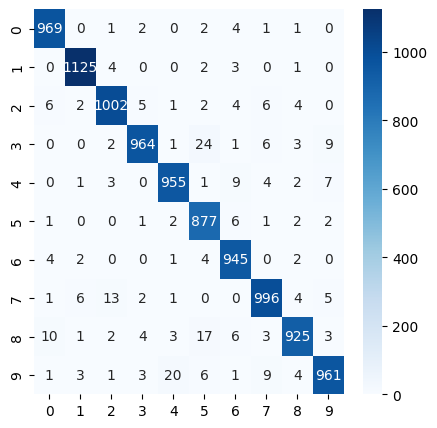

In [24]:
plt.figure(figsize=(5,5))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel = ('True labels')
plt.xlabel = ('Predicted labels')


IMAGE PREDICTION


1/1 [==============================] - 0s 14ms/step
0


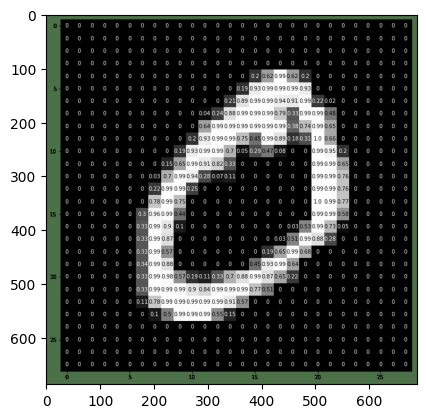

In [29]:
input_image_path =input("The path for image prediction : ")

inp_img = cv2.imread(input_image_path)

plt.imshow(inp_img)

grayscale = cv2.cvtColor(inp_img, cv2.COLOR_RGB2GRAY)

inp_img_resize = cv2.resize(grayscale, (28,28))

inp_img_resize = inp_img_resize/255

img_resized = np.reshape(inp_img_resize, [1,28,28])

inp_pred = model.predict(img_resized)

input_label_prediction = np.argmax(inp_pred)

print(input_label_prediction)